In [1]:
import math
import numpy as np
import torch
import torchvision
import transformers

device = torch.device("cuda")

#image_processor = transformers.AutoImageProcessor.from_pretrained("microsoft/resnet-50")
image_processor = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    #lambda x: x / 255,
])
model = transformers.ResNetModel.from_pretrained("microsoft/resnet-18").to(device)

(255, 198)


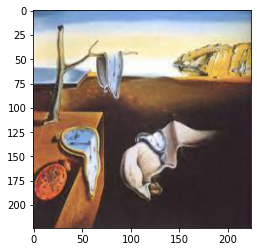

torch.Size([1, 3, 224, 224])
torch.Size([1, 64, 56, 56])
tensor(385.3820, device='cuda:0')
tensor(5.8512e-05, device='cuda:0')

torch.Size([1, 64, 56, 56])
tensor(6120.9146, device='cuda:0')
tensor(0.0002, device='cuda:0')

torch.Size([1, 128, 28, 28])
tensor(2187.3013, device='cuda:0')
tensor(3.0457e-05, device='cuda:0')

torch.Size([1, 256, 14, 14])
tensor(732.3770, device='cuda:0')
tensor(5.5836e-05, device='cuda:0')

torch.Size([1, 512, 7, 7])
tensor(26010.8379, device='cuda:0')
tensor(1.7667, device='cuda:0')



In [9]:
import matplotlib.pyplot as plt
import PIL

def content_loss(a, b):
    diff2 = (a - b) / 2
    diff2 = diff2 * diff2
    return torch.sum(diff2)

def gram(layer):
    shape = layer.shape
    features = layer.reshape((shape[0], shape[1], shape[2] * shape[3]))
    g = torch.matmul(features, features.transpose(1, 2))
    return g

def style_loss(a, b):
    a_gram, b_gram = gram(a), gram(b)
    diff2 = (a_gram - b_gram) / 2 / a.shape[1] / a.shape[2] / a.shape[3]
    diff2 = diff2 * diff2
    return torch.sum(diff2)

dog = PIL.Image.open('dog6.jpeg')
#print(np.asarray(dog))
time = PIL.Image.open('time2.jpeg')
#dog.show()
print(dog.size)

dog_inputs = image_processor(dog).unsqueeze(0).to(device)
#print(dog_inputs)
#print(torch.min(dog_inputs))
time_inputs = image_processor(time).unsqueeze(0).to(device)
plt.imshow(time_inputs.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())
plt.show()
print(dog_inputs.shape)
with torch.no_grad():
    dog_outputs = model(dog_inputs, output_hidden_states = True)
    time_outputs = model(time_inputs, output_hidden_states = True)

for dog_state, time_state in zip(dog_outputs.hidden_states, time_outputs.hidden_states):
    print(dog_state.shape)
    print(content_loss(dog_state, time_state))
    print(style_loss(dog_state, time_state))
    print("")    

In [14]:
for name, param in model.named_parameters():
    print(name)
    param.requires_grad = False

['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_auto_class', '_backward_compatibility_gradient_checkpointing', '_backward_hooks', '_buffers', '_call_impl', '_check_and_enable_flash_attn_2', '_convert_head_mask_to_5d', '_copy_lm_head_original_to_resized', '_create_repo', '_dispatch_accelerate_model', '_expand_inputs_for_generation', '_extract_past_from_model_output', '_forward_hooks', '_forward_pre_hooks', '_from_config', '_get_backward_hooks', '_get_decoder_start_token_id', '_get_files_timestamps', '_get_generation_mode', '_get_logits_processor', '_get_logits_warper', '_get_name', '_get_resized_embeddings

torch.Size([1, 3, 224, 224])
1591.826171875


<ipython-input-8-3d8caa5c352b>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(image_processor(content_target).unsqueeze(0), requires_grad=True, device=device)


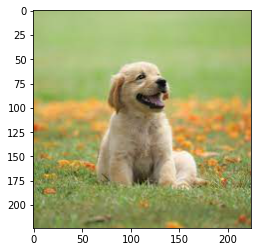

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1285.072265625


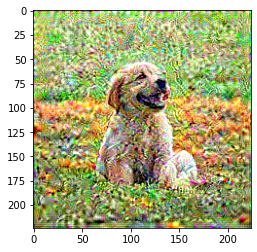

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1286.534912109375


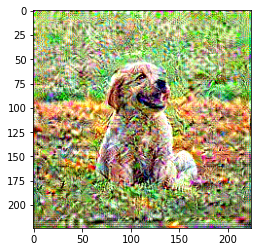

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1282.5438232421875


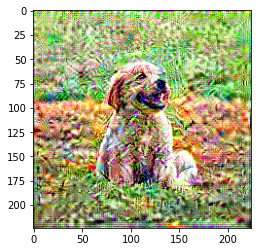

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1278.25341796875


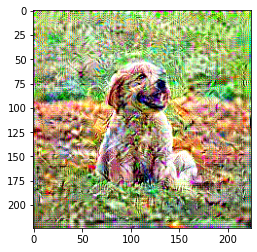

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1275.6785888671875


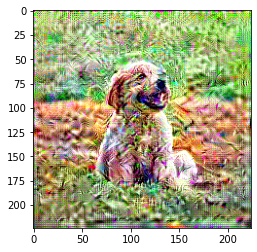

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1279.615234375


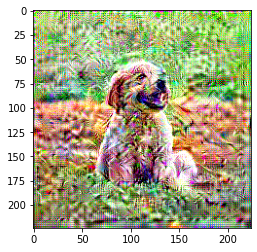

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1279.3677978515625


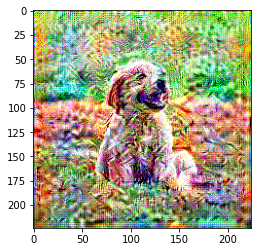

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1275.86083984375


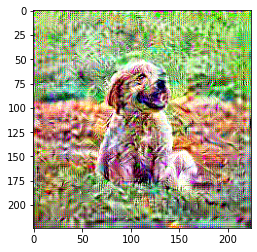

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1282.9305419921875


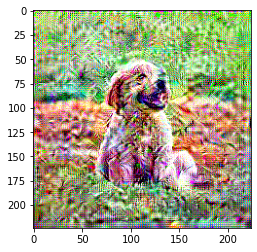

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1276.89306640625


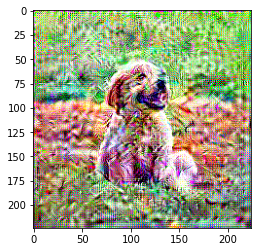

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1275.4490966796875


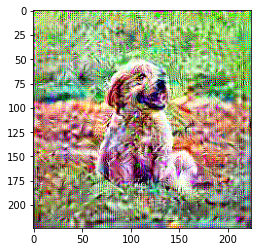

KeyboardInterrupt: 

In [8]:
content_target = PIL.Image.open('dog.jpeg')
#style_target = PIL.Image.open('dog_sketch.jpeg')
style_target = PIL.Image.open('dog_sketch.jpeg')

img = torch.tensor(image_processor(content_target).unsqueeze(0), requires_grad=True, device=device)
print(img.shape)

with torch.no_grad():
    content_inputs = image_processor(content_target).unsqueeze(0).to(device)
    style_inputs = image_processor(style_target).unsqueeze(0).to(device)
    content_outputs = model(content_inputs, output_hidden_states = True)
    style_outputs = model(style_inputs, output_hidden_states = True)

optimiser = torch.optim.Adam([img], lr = 1e-2, eps = 1e-12)
for i in range(1000000):
    optimiser.zero_grad()
    img_outputs = model(img, output_hidden_states = True)
    loss = (
        #content_loss(img_outputs.hidden_states[0], content_outputs.hidden_states[0])+
        #content_loss(img_outputs.hidden_states[1], content_outputs.hidden_states[1])
        #content_loss(img_outputs.hidden_states[2], content_outputs.hidden_states[2])+
        #content_loss(img_outputs.hidden_states[3], content_outputs.hidden_states[3])+
        content_loss(img_outputs.hidden_states[4], content_outputs.hidden_states[4])
    ) / 1 + (
        style_loss(img_outputs.hidden_states[0], style_outputs.hidden_states[0])+
        style_loss(img_outputs.hidden_states[1], style_outputs.hidden_states[1])+
        style_loss(img_outputs.hidden_states[2], style_outputs.hidden_states[2])+
        style_loss(img_outputs.hidden_states[3], style_outputs.hidden_states[3])+
        style_loss(img_outputs.hidden_states[4], style_outputs.hidden_states[4])
    ) / 5 * 10000
    if i % 10000 == 0:
        print(loss.item())
        plt.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())
        plt.show()
    loss.backward()
    optimiser.step()

plt.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())
plt.show()

torch.Size([1, 3, 224, 224])
2103.543701171875


<ipython-input-10-738fbbc1c726>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(image_processor(content_target).unsqueeze(0), requires_grad=True, device=device)


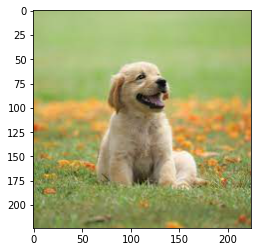

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1849.6724853515625


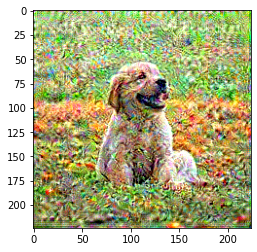

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1842.0523681640625


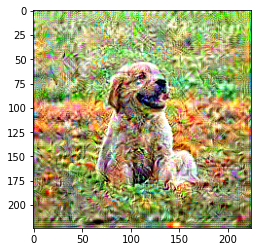

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1841.481689453125


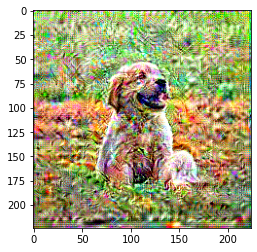

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1841.755615234375


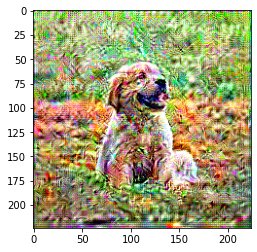

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1841.421630859375


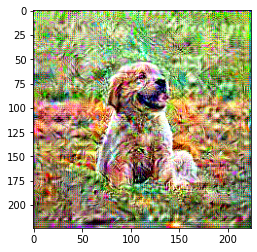

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1838.700439453125


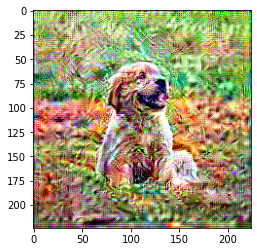

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1856.343017578125


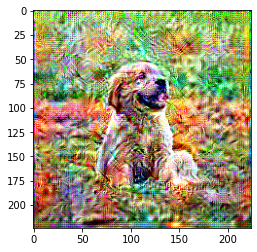

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1837.7413330078125


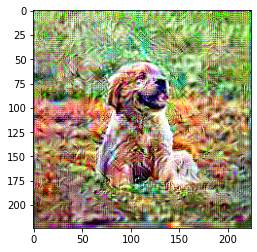

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1837.91064453125


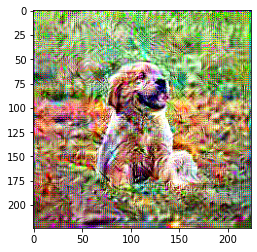

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1844.61865234375


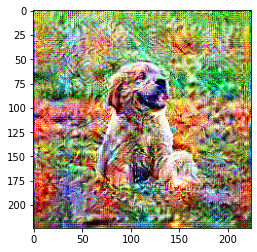

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1839.9066162109375


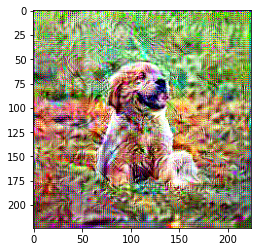

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1837.9942626953125


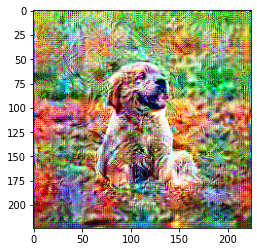

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1840.00439453125


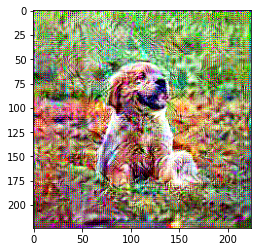

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1843.5714111328125


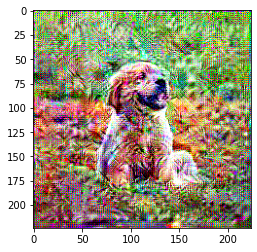

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1840.4893798828125


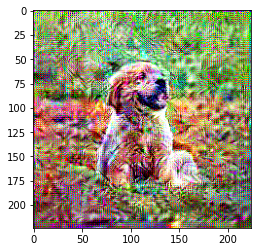

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1837.1617431640625


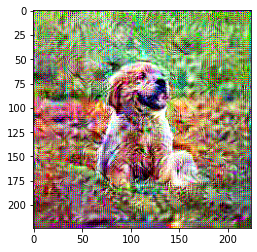

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1837.64892578125


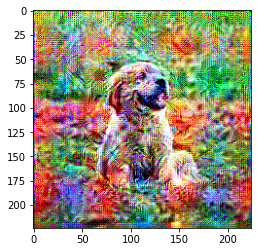

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1840.1937255859375


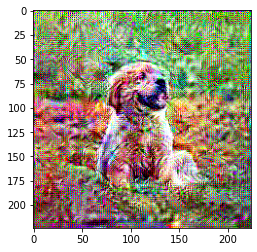

KeyboardInterrupt: 

In [10]:
content_target = PIL.Image.open('dog.jpeg')
#style_target = PIL.Image.open('dog_sketch.jpeg')
style_target = PIL.Image.open('time2.jpeg')

img = torch.tensor(image_processor(content_target).unsqueeze(0), requires_grad=True, device=device)
print(img.shape)

with torch.no_grad():
    content_inputs = image_processor(content_target).unsqueeze(0).to(device)
    style_inputs = image_processor(style_target).unsqueeze(0).to(device)
    content_outputs = model(content_inputs, output_hidden_states = True)
    style_outputs = model(style_inputs, output_hidden_states = True)

optimiser = torch.optim.Adam([img], lr = 1e-3, eps = 1e-12)
for i in range(1000000):
    optimiser.zero_grad()
    img_outputs = model(img, output_hidden_states = True)
    loss = (
        #content_loss(img_outputs.hidden_states[0], content_outputs.hidden_states[0])+
        #content_loss(img_outputs.hidden_states[1], content_outputs.hidden_states[1])
        #content_loss(img_outputs.hidden_states[2], content_outputs.hidden_states[2])+
        #content_loss(img_outputs.hidden_states[3], content_outputs.hidden_states[3])+
        content_loss(img_outputs.hidden_states[4], content_outputs.hidden_states[4])
    ) / 1 + (
        style_loss(img_outputs.hidden_states[0], style_outputs.hidden_states[0])+
        style_loss(img_outputs.hidden_states[1], style_outputs.hidden_states[1])+
        style_loss(img_outputs.hidden_states[2], style_outputs.hidden_states[2])+
        style_loss(img_outputs.hidden_states[3], style_outputs.hidden_states[3])+
        style_loss(img_outputs.hidden_states[4], style_outputs.hidden_states[4])
    ) / 5 * 10000
    if i % 10000 == 0:
        print(loss.item())
        plt.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())
        plt.show()
    loss.backward()
    optimiser.step()

plt.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())
plt.show()